In [1]:
%matplotlib inline

import logging

import emcee
import h5py
import numpy as np
import matplotlib.pyplot as plt

from os import path
import sys
sys.path.insert(0, path.abspath('../'))

from src import workdir, parse_model_parameter_file
from src.emulator import Emulator
from src.mcmc import Chain

In [2]:
exp_path = "pseudo_expdata.txt"
model_par = "ABCD.txt"
training_set = "model_results"
mymcmc = Chain(expdata_path=exp_path, model_parafile=model_par,
               training_data_path=training_set)

[INFO][mcmc] Initializing MCMC ...
[INFO][mcmc] Final Markov Chain results will be saved in mcmc/chain.h5
[INFO][mcmc] Loading the model parameters space from ABCD.txt ...
[INFO][mcmc] Loading the experiment data from pseudo_expdata.txt ...
[INFO][mcmc] Initializing emulators for the training model ...
[INFO][emulator] loading training data from model_results ...
[INFO][emulator] All training data are loaded.
[INFO][emulator] 10 PCs explain 0.99985 of variance
[INFO][emulator] Training emulators...


/usr/local/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:411: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
/usr/local/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 0.0001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
/usr/local/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:411: ConvergenceWarning: The optimal value found for dimension 2 of parameter k1__k2__length_scale is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
/usr

[INFO][emulator] GP 0: 0.43084 of variance, LML = 1265.9, kernel: 59.8**2 * RBF(length_scale=[10, 0.505, 8.53, 0.954]) + WhiteKernel(noise_level=0.0001)
[INFO][emulator] GP 1: 0.37401 of variance, LML = 1154.3, kernel: 54.2**2 * RBF(length_scale=[5.45, 0.238, 10, 2.08]) + WhiteKernel(noise_level=0.0001)
[INFO][emulator] GP 2: 0.10007 of variance, LML = 1132.8, kernel: 25.8**2 * RBF(length_scale=[3.69, 0.178, 10, 4.13]) + WhiteKernel(noise_level=0.0001)
[INFO][emulator] GP 3: 0.07000 of variance, LML = 1080.2, kernel: 32.9**2 * RBF(length_scale=[9.93, 0.581, 5.81, 0.674]) + WhiteKernel(noise_level=0.000153)
[INFO][emulator] GP 4: 0.02159 of variance, LML = 840.52, kernel: 48.7**2 * RBF(length_scale=[3.77, 0.159, 10, 4.85]) + WhiteKernel(noise_level=0.000223)
[INFO][emulator] GP 5: 0.00194 of variance, LML = 216.97, kernel: 12.8**2 * RBF(length_scale=[2.22, 0.1, 10, 1.14]) + WhiteKernel(noise_level=0.00345)
[INFO][emulator] GP 6: 0.00123 of variance, LML = 132.17, kernel: 23.5**2 * RBF(l

/usr/local/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


[INFO][mcmc] Starting MCMC ...
[INFO][mcmc] no existing chain found, starting initial burn-in
[INFO][mcmc] running 100 walkers for 100 steps
[INFO][mcmc] step 10: acceptance fraction: mean 0.3860, std 0.1679, min 0.1000, max 0.7000
[INFO][mcmc] step 20: acceptance fraction: mean 0.3755, std 0.1238, min 0.1500, max 0.7000
[INFO][mcmc] step 30: acceptance fraction: mean 0.3807, std 0.0929, min 0.1667, max 0.6333
[INFO][mcmc] step 40: acceptance fraction: mean 0.3862, std 0.0835, min 0.2250, max 0.6000
[INFO][mcmc] step 50: acceptance fraction: mean 0.4014, std 0.0809, min 0.2200, max 0.6000
[INFO][mcmc] step 60: acceptance fraction: mean 0.4218, std 0.0778, min 0.2500, max 0.6167
[INFO][mcmc] step 70: acceptance fraction: mean 0.4449, std 0.0728, min 0.3000, max 0.6286
[INFO][mcmc] step 80: acceptance fraction: mean 0.4615, std 0.0671, min 0.3000, max 0.6375
[INFO][mcmc] step 90: acceptance fraction: mean 0.4770, std 0.0593, min 0.3667, max 0.6222
[INFO][mcmc] step 100: acceptance fracti

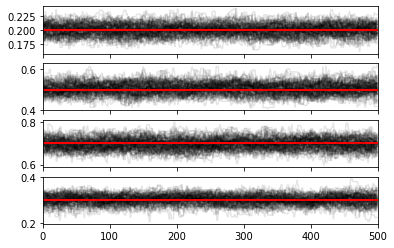

[(0.2011677545329697, 0.010074723881458858, 0.01039255848060805), (0.5051075701631733, 0.027831592416044604, 0.027504876278030943), (0.6967914120360775, 0.0261770205720252, 0.026335968241332997), (0.3033378490192604, 0.020244502418703736, 0.021405532248226833)]


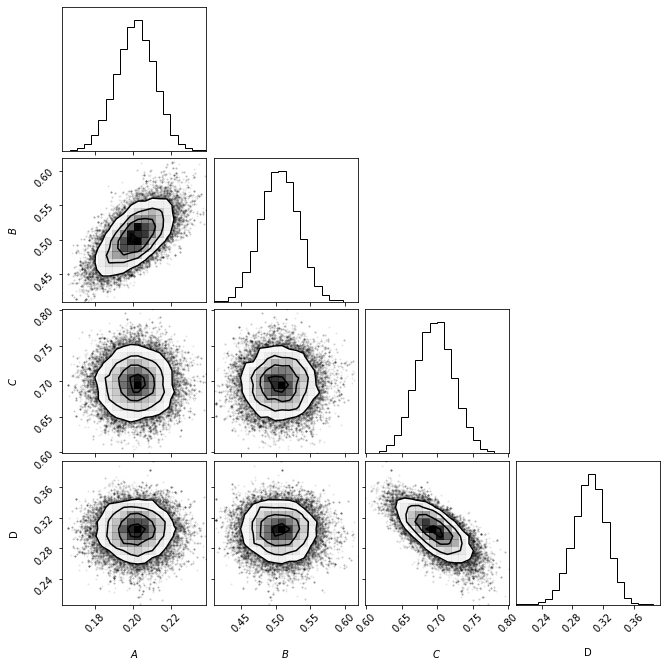

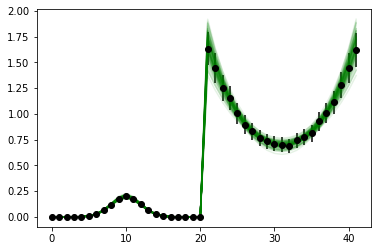

In [3]:
nsteps = 500
nwalkers = 100
nburnsteps = 200
status = None
mymcmc.run_mcmc(nsteps=nsteps, nburnsteps=nburnsteps,
                nwalkers=nwalkers, status=status)